In [90]:
# import default sciences 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [91]:
# import data.csv

data = pd.read_csv('data.csv')

labels = {
    't': 'Time (s)',
    'f.d': 'Ferricyanide Dark',
    'p.d': 'Phenylquinone Dark',
    'f.l': 'Ferricyanide Light',
    'p.l': 'Phenylquinone Light',
    'f.l.h': 'Ferricyanide Light Herbicide',
    'p.l.h': 'Phenylquinone Light Herbicide'
}

print(data)

      t  f.d  p.d  f.l  p.l  f.l.h  p.l.h
0     0  416  233  435  242    610    318
1    20  419  233  442  243    613    317
2    40  431  235  447  247    614    321
3    60  433  237  455  252    612    323
4    80  435  238  457  257    614    318
5   100  436  239  467  258    612    319
6   120  434  236  475  266    605    324
7   140  436  242  482  270    610    328
8   160  437  241  489  273    605    329
9   180  438  240  492  280    613    329
10  200  436  241  504  281    614    327
11  220  437  240  513  283    608    329
12  240  435  241  518  287    613    333


In [92]:
chlorophyll_abs = 0.257 # A652
chlorophyll_inital_conc = chlorophyll_abs * 2.9 # mg/ml

print(chlorophyll_inital_conc, " mg/ml")

0.7453  mg/ml


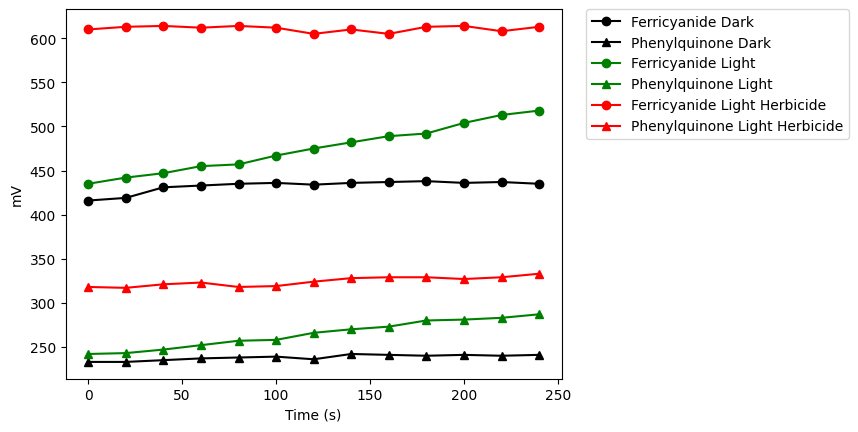

In [93]:
# plot each of  f.d  p.d  f.l  p.l  f.l.h  p.l.h against t (where f are dots and p are triangles; d are black, l are green and h are red)

plt.plot(data['t'], data['f.d'], label=labels['f.d'], color='black', marker='o')
plt.plot(data['t'], data['p.d'], label=labels['p.d'], color='black', marker='^')
plt.plot(data['t'], data['f.l'], label=labels['f.l'], color='green', marker='o')
plt.plot(data['t'], data['p.l'], label=labels['p.l'], color='green', marker='^')
plt.plot(data['t'], data['f.l.h'], label=labels['f.l.h'], color='red', marker='o')
plt.plot(data['t'], data['p.l.h'], label=labels['p.l.h'], color='red', marker='^')

# legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time (s)')
plt.ylabel('mV')
plt.show()

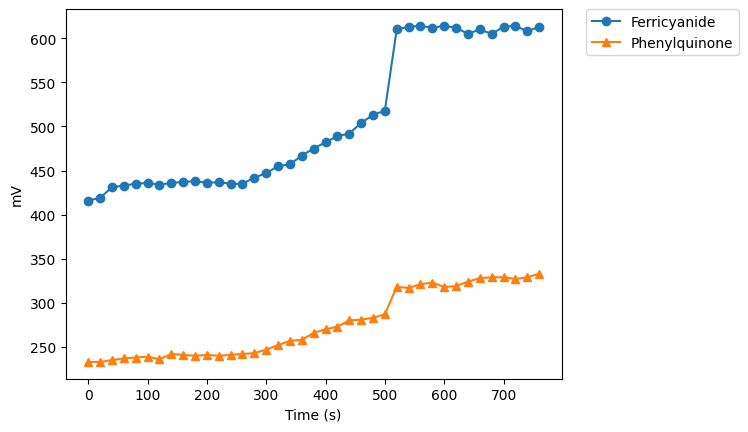

In [96]:
# generate a dataset f which is f.d followed by f.l followed by f.l.h
# generate a dataset p which is p.d followed by p.l followed by p.l.h

f = np.concatenate((data['f.d'], data['f.l'], data['f.l.h']))
p = np.concatenate((data['p.d'], data['p.l'], data['p.l.h']))


# generate a dataset t which starts at 0 and ends at 720 with steps of 20

t = np.arange(0, 780, 20)

# plot two graphs with f and p on the same x axis, one with dots and one with triangles, colour code the first 3rd as black, the second 3rd as green and the last 3rd as red

plt.plot(t, f, label='Ferricyanide', marker='o')
plt.plot(t, p, label='Phenylquinone', marker='^')

# legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time (s)')
plt.ylabel('mV')

# add a line at x=240


plt.show()

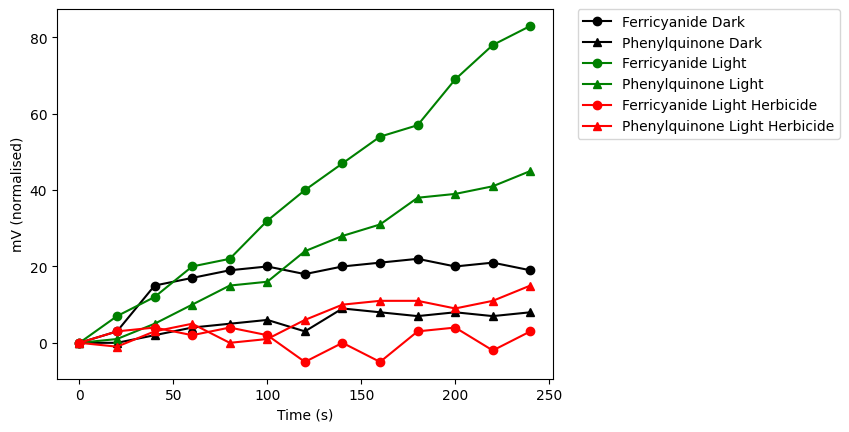

In [ ]:
# recalculate the dataset to normalise the f's and the p's to be the inital value of f.d and p.d

plt.plot(data['t'], data['f.d'] - data['f.d'][0], label=labels['f.d'], color='black', marker='o')


# legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time (s)')
plt.ylabel('mV (normalised)')
plt.show()

In [97]:
## test f.l.h vs p.l.h for aov

model = ols("f.l.h" ~ "p.l.h", data=data).fit()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3844622244.py, line 3)

In [ ]:
##1. photosynthesis rate in dark

##2. photosynthesis rate in light

##3. Conversion of mV to O2 conc

o2_sat = 0.255 #umol ml-1

##4.